<h1 style="text-align: center;">Étude de Marché :</h1>
<h2 style="text-align: center;">Analyse des données pour l'exportation de poulet</h2>

<div style="text-align: center;">
    <img src="data/logo.jpg" alt="Mon logo" width="300"/>
</div>

# *Rappel de la Mission*

## I - Contexte
Lancement à l'international de l’entreprise sur le marché du poulet, sans cible géographique précise.

## II - Objectif
Analyser et identifier des groupements de pays potentiels à cibler à partir des données FAO (Food and Agriculture Organization).

## III- Méthodologie
1. **Choix des indicateurs** : Sélection des données pertinentes pour l'analyse.
2. **Classification Ascendante Hiérarchique (CAH)** : Construction d'un dendrogramme pour visualiser les groupes.
3. **K-means** : Partitionnement des pays, analyse des centroïdes et interprétation des classes.
4. **Clustering** : Comparaison des résultats de deux méthodes de clustering.
5. **Analyse en Composantes Principales (ACP)** : Visualisation des liens entre variables et pays.
6. **Analyse des résultats** : Evaluation des données obtenues pour chaque cluster.
7. **Interprétations et recommandations** : Identification des marchés prioritaires pour l'exportation selon les clusters.

## IV- Points attendus
- Identification de groupes cohérents de pays.
- Compréhension des relations entre les variables.


# PARTIE II : Dendrogrammes, clusters K-means, ACP et récommandations

# Sommaire Partie II

- **A** - Importation des librairies 
- **B** - Importation des données 
- **C** - Standardisation des données 
- **D** - Classification Ascendante Hiérarchique (CAH)
- **E** - K-means
- **F** - Affichage des clusters
- **G** - Étude de la cohérence des clusters
- **H** - Analyse des clusters
- **I** - PCA du cluster sélectionné
- **J** - Recommandations- Choix des Pays


# A - Import des librairies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


from mpl_toolkits.mplot3d import Axes3D

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances

import geopandas as gpd
from shapely.geometry import Point
from shapely.wkt import loads


In [2]:
np.random.seed(42)

# B- Import du dataframe

In [3]:
#Import du df issue du notebook nettoyage des données
df= pd.read_csv("file:data/data_ok.csv")
df.head(2)

,pays,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
0,Afghanistan,AFG,530.15,97.7,2.08,-2.79,1.53,49.12,50.88,5.47
1,Afrique du Sud,ZAF,6723.93,84.4,3.75,-0.28,35.69,78.71,24.27,2.93


**Affichage des pays dans une map pour avoir une vue d'ensemble**


C:\Users\33618\AppData\Local\Temp\ipykernel_14256\3543662481.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\33618\AppData\Local\Temp\ipykernel_14256\3543662481.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world = world.append(pays_df, ignore_index=True)
C:\Users\33618\anaconda3\lib\site-packages\geopandas\array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


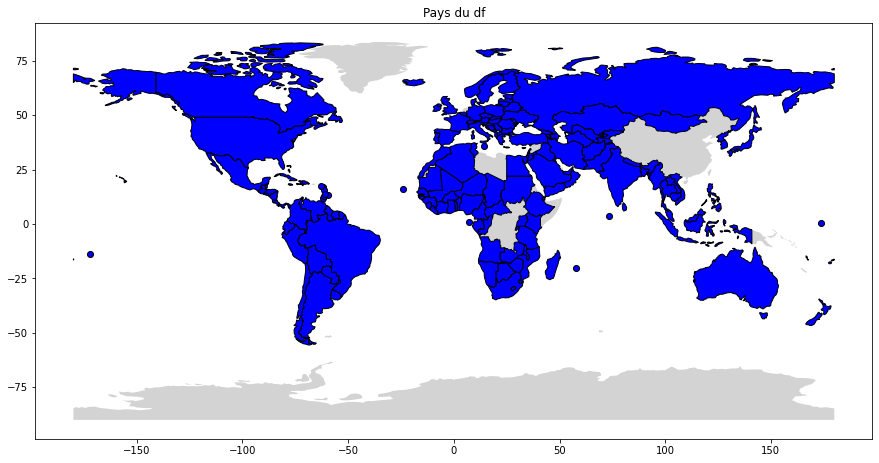

In [4]:
# données géographiques du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtre des données pour inclure uniquement nos pays 
pays_a_afficher = df['code ISO3'].unique()
world_subset = world[world['iso_a3'].isin(pays_a_afficher)]

# Création d'une liste de dictionnaires contenant les informations sur les pays à ajouter 
#( ses pays ne sont pas repertoriés dans la base geopandas)
pays_liste = [
    {"name": "Antigua-et-Barbuda","continent": "Amérique du Nord", "iso_a3":"ATG","latitude": 17.223472, "longitude": -61.955461},
    {"name": "Barbade","continent": "Amérique du Nord", "iso_a3":"BRB", "latitude": 13.150033, "longitude": -59.525030},
    {"name": "Cabo Verde","continent":"Afrique", "iso_a3":"CPV", "latitude": 16.000055, "longitude": -24.008395},
    {"name": "Dominique","continent":"Amérique du Nord", "iso_a3":"DMA", "latitude": 15.411314, "longitude": -61.365362},
    {"name": "Grenade","continent":"Amérique du Nord", "iso_a3":"GRD", "latitude": 12.136037, "longitude": -61.690404},
    {"name": "Kiribati","continent": "Océanie", "iso_a3":"KIR", "latitude": 0.344861, "longitude": 173.664177},
    {"name": "Maldives","continent": "Asie", "iso_a3":"MDV", "latitude": 3.720350, "longitude": 73.224415},
    {"name": "Malte","continent":"Europe",  "iso_a3":"MLT", "latitude": 35.888599, "longitude": 14.447691},
    {"name": "Maurice", "continent":"Afrique", "iso_a3":"MUS", "latitude": -20.275945, "longitude": 57.570357},
    {"name": "Saint-Kitts-et-Nevis","continent": "Amérique du Nord", "iso_a3":"KNA", "latitude": 17.250512, "longitude": -62.672597},
    {"name": "Saint-Vincent-et-les Grenadines","continent": "Amérique du Nord", "iso_a3":"VCT", "latitude": 12.904470, "longitude": -61.276557},
    {"name": "Sainte-Lucie","continent":"Amérique du Nord",  "iso_a3":"LCA", "latitude": 13.825049, "longitude": -60.975036},
    {"name": "Samoa","continent": "Océanie", "iso_a3":"WSM", "latitude": -13.769390, "longitude": -172.120050},
    {"name": "Sao Tomé-et-Principe","continent":"Afrique", "iso_a3":"STP", "latitude": 0.971310, "longitude": 7.022550}]

# Conversion des coordonnées en géométries Point
geom_points = [Point(lon, lat) for lon, lat in zip([item["longitude"] for item in pays_liste], \
                                                   [item["latitude"] for item in pays_liste])]

# Création d'un GeoDataFrame avec les informations sur les pays et leurs géométries Point
pays_df = gpd.GeoDataFrame(pays_liste, geometry=geom_points)

# Ajout des nouveaux pays au GeoDataFrame world
world = world.append(pays_df, ignore_index=True)

# Filtre des données pour inclure uniquement les pays du df

world_subset1 = world[world['iso_a3'].isin(pays_a_afficher)]

# Carte du monde avec les pays du df
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
world_subset1.plot(ax=ax, color='blue', edgecolor='black')
plt.title('Pays du df')
plt.show()



In [5]:
#  Dispersion globale des données 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PIB,164.0,13123.871890,18525.179398,414.74,1932.7025,5799.935000,15719.0475,110203.01
%pop_acces_electricite,164.0,84.096341,25.638521,10.90,79.1500,99.565000,100.0000,100.00
perf_logistique,164.0,2.895814,0.558543,1.64,2.5200,2.895814,3.1575,4.29
Stab_po,164.0,-0.098049,0.890253,-2.93,-0.6425,-0.050000,0.6050,1.56
DA(kg/personne/an),164.0,19.709329,15.685095,0.13,6.2825,17.325000,28.3875,72.31
TAS,164.0,78.677062,44.919155,0.00,49.7800,87.955000,100.0000,304.61
TDI,164.0,41.811111,44.610415,0.00,4.1625,24.255000,76.6350,222.37
%variation_population,164.0,2.632744,2.348894,-2.95,0.9950,2.410000,4.3675,9.34


In [6]:
# Verification des valeurs nulles
df.isnull().sum()

pays                      0
code ISO3                 0
PIB                       0
%pop_acces_electricite    0
perf_logistique           0
Stab_po                   0
DA(kg/personne/an)        0
TAS                       0
TDI                       0
%variation_population     0
dtype: int64

In [7]:
# Mise en index de la colonne pays 
df.set_index("pays", inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, Afghanistan to Éthiopie
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code ISO3               164 non-null    object 
 1   PIB                     164 non-null    float64
 2   %pop_acces_electricite  164 non-null    float64
 3   perf_logistique         164 non-null    float64
 4   Stab_po                 164 non-null    float64
 5   DA(kg/personne/an)      164 non-null    float64
 6   TAS                     164 non-null    float64
 7   TDI                     164 non-null    float64
 8   %variation_population   164 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.8+ KB


# C- Standardisation des données
**Centrage et reduction (1 Scaling moyenne à 0 et un écart type à 1)**

In [9]:
# Séparation des données. D'un coté X la matrice des données :
X = df.values
X[:2]

array([['AFG', 530.15, 97.7, 2.08, -2.79, 1.53, 49.12, 50.88, 5.47],
       ['ZAF', 6723.93, 84.4, 3.75, -0.28, 35.69, 78.71, 24.27, 2.93]],
      dtype=object)

In [10]:
#  Forme de la matrice 
type(X)

numpy.ndarray

In [11]:
# Taille de la matrice 
X.shape

(164, 9)

In [12]:
# Sélection des colonnes numériques du df
numeric_cols = df.select_dtypes(include=['number']).columns
X = df[numeric_cols]

In [13]:
# Enregistrement des noms  des pays  dans une variable names :
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur',
       'États-Unis d'Amérique', 'Éthiopie'],
      dtype='object', name='pays', length=164)

In [14]:
# Enregistrement des noms des colonnes dans une variable features :
features=numeric_cols
features

Index(['PIB', '%pop_acces_electricite', 'perf_logistique', 'Stab_po',
       'DA(kg/personne/an)', 'TAS', 'TDI', '%variation_population'],
      dtype='object')

In [15]:
# Scaling des données
scaler = StandardScaler() # On instancie
X_scaled = scaler.fit_transform(X)
X_scaled[:5]


array([[-6.81898599e-01,  5.32219607e-01, -1.46508462e+00,
        -3.03306765e+00, -1.16256923e+00, -6.60021096e-01,
         2.03913481e-01,  1.21161131e+00],
       [-3.46530711e-01,  1.18801149e-02,  1.53399538e+00,
        -2.05007563e-01,  1.02196488e+00,  7.35507625e-04,
        -3.94410944e-01,  1.26939141e-01],
       [-4.65769763e-01,  6.17899568e-01, -7.97520399e-16,
         5.27358596e-01, -2.14189814e-01, -1.13923153e+00,
         8.77787326e-01, -1.21822517e+00],
       [-4.86713945e-01,  6.03815191e-01, -4.05529408e-01,
        -9.26106550e-01, -8.52411430e-01,  4.60071883e-01,
        -9.23931432e-01,  6.60734502e-01],
       [ 1.70810589e+00,  6.22203128e-01,  2.44988209e+00,
         7.52702030e-01, -1.53051215e-02,  1.87194367e-01,
         1.48600513e-01, -6.71618720e-01]])

In [16]:
# Vérification moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# D - Classification Ascendante Hiérarchique (CAH)

### Recherche du nombre optimal de clusters

Nous voulons que nos clusters respectent les critères suivants :

- **Resserrés sur eux-mêmes** : deux points qui sont proches doivent appartenir au même cluster.
- **Loin les uns des autres** : deux points qui sont éloignés doivent appartenir à des clusters différents.

L'objectif est de former des groupes homogènes tout en maximisant la séparation entre les clusters.


# 3. **Classification Ascendante Hiérarchique (CAH)**

### Recherche du nombre optimal de clusters

Nous voulons que nos clusters remplissent les conditions suivantes :

- **Resserrés sur eux-mêmes** : deux points qui sont proches doivent appartenir au même cluster.
- **Loin les uns des autres** : deux points qui sont éloignés doivent appartenir à des clusters différents.

L'objectif est de former des groupes homogènes tout en maximisant la différence entre les groupes. Pour ce faire, nous utilisons des méthodes de clustering hiérarchique et un dendrogramme pour visualiser le nombre optimal de clusters.


## D-1 Calcule de la matrice de liaison 
**Elle permettra de mesurer de similarité entre les différents clusters**

In [17]:
# Matrice de liason
Z = linkage(X_scaled, method="ward")
Z[:3]

array([[102.        , 135.        ,   0.38457844,   2.        ],
       [  6.        , 126.        ,   0.3921115 ,   2.        ],
       [ 32.        ,  64.        ,   0.43715863,   2.        ]])

## D-2 Dendrogram

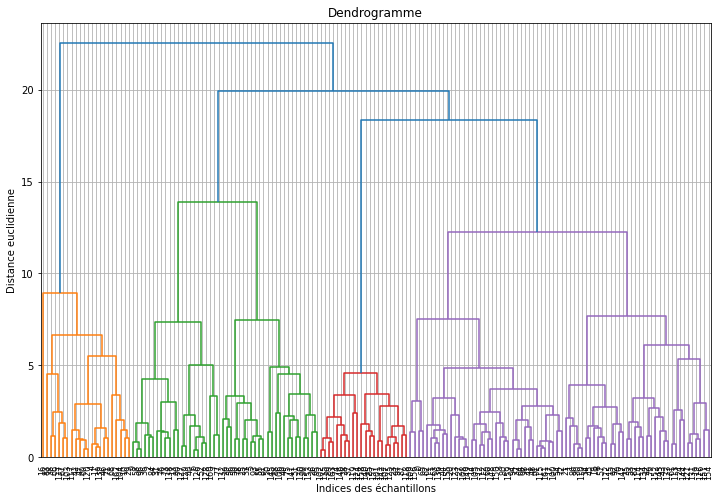

In [18]:

# Création du dendrogram
plt.figure(figsize=(12, 8))

# Définition du titre du graphique
plt.title('Dendrogramme')

# Définition du label de l'axe des x
plt.xlabel('Indices des échantillons')

# Définition du label de l'axe des y
plt.ylabel('Distance euclidienne')

# Traçage du dendrogramme 
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

# Activation de la grille pour une meilleure visualisation
plt.grid(True)

# Affichage du graphique
plt.show()

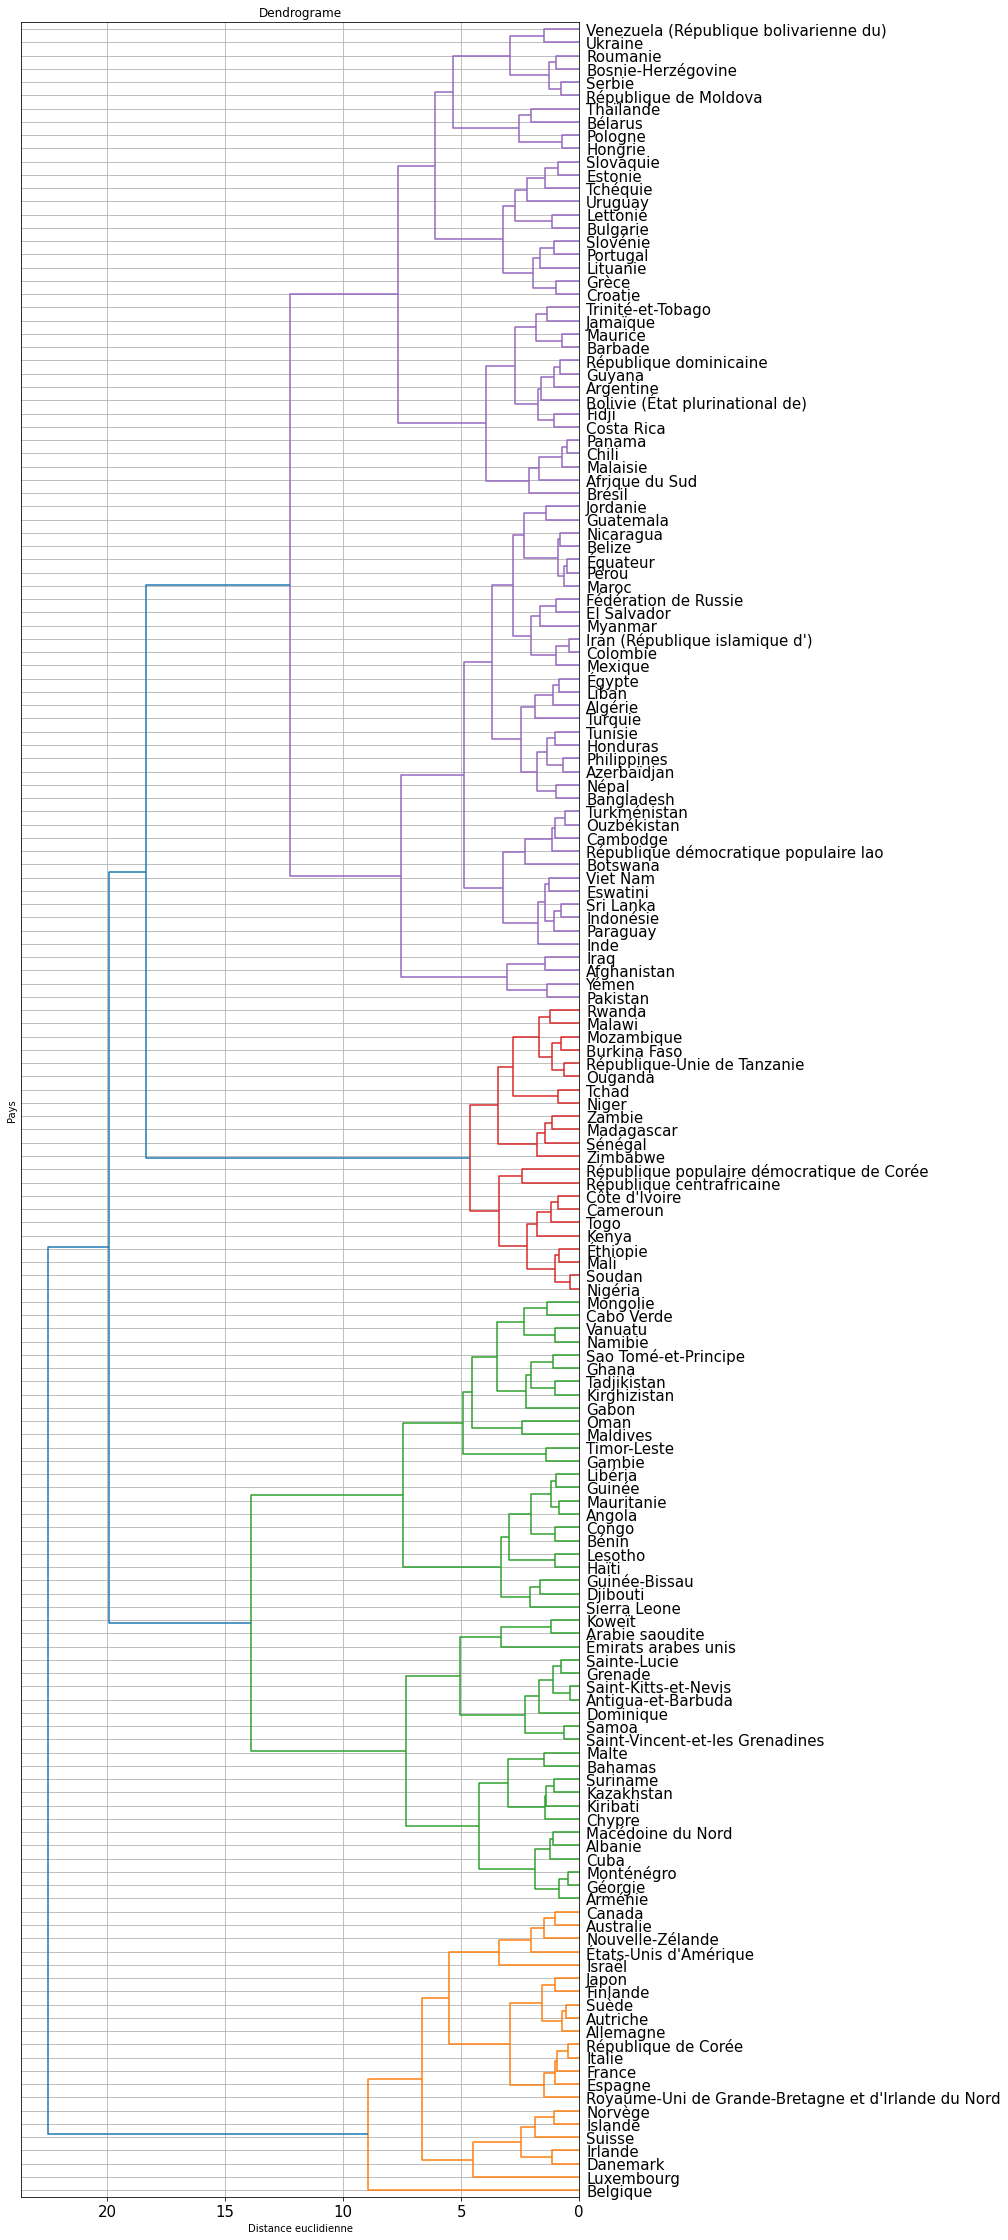

In [19]:
# Orientation du dendrogramme à gauche pour une meilleur lisibilité des pays par clusters

fig, ax = plt.subplots(1, 1, figsize=(10,40))

dendrogram(Z, ax=ax, labels=names, orientation = "left")

plt.title("Dendrograme")
ax.set_xlabel('Distance euclidienne')
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
plt.grid(True)

**On défini le nombre de clusters que l'on souhaite pour une distance à 14**

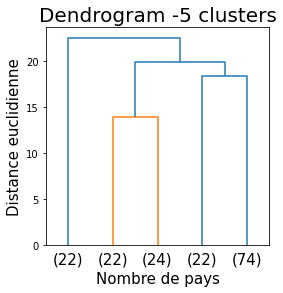

In [20]:
k=5
# Découpage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(4,4))
plt.title('Dendrogram -5 clusters', fontsize=20)
plt.xlabel('Nombre de pays', fontsize=15)
plt.ylabel('Distance euclidienne', fontsize=15)
dendrogram(Z, labels = df.index, p=5, truncate_mode='lastp', leaf_font_size=15)
plt.show()

# E- KMEANS

**L'algorithme du k-means permet de rechercher efficacement une partition des données dont la variance intracluster est minimale.**


## E-1 Méthode du coude

Calcul de l'inertie de kmeans pour 5 clusters


In [21]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = []

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

#inertie de kmeans pour 5 clusters
kmeans.inertia_

C:\Users\33618\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


406.3256943247741

Évolution de l inertie en fonction du nombre de clusters

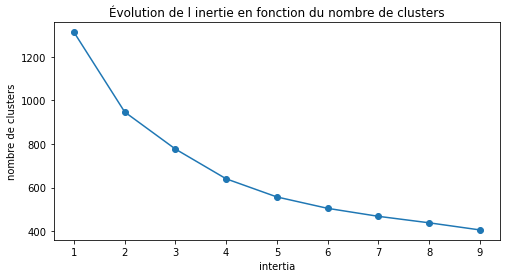

[1312.0000000000002,
 946.5572400281393,
 776.6692821871253,
 640.4112822258387,
 557.332184916925,
 505.18290965071327,
 468.6043712530618,
 438.9165601919668,
 406.3256943247741]

In [22]:
# Graphique de ligne en utilisant les données de k_list comme abscisses 
# et intertia_list comme ordonnées avec des marqueurs circulaires

fig = plt.figure(figsize=(8,4))

plt.plot(k_list, intertia_list,marker='o')

plt.xlabel("intertia")
plt.ylabel('nombre de clusters')
plt.title('Évolution de l inertie en fonction du nombre de clusters')
plt.show()

# liste d'inerties
intertia_list

le point d'inflexion semble se situer entre 3 et 5 

## E-2 Coefficient de SILHOUETTE

For n_clusters = 2 The average silhouette_score is : 0.24496397115618584
For n_clusters = 3 The average silhouette_score is : 0.2465419130113772
For n_clusters = 4 The average silhouette_score is : 0.2611979193653885
For n_clusters = 5 The average silhouette_score is : 0.2676938142720159
For n_clusters = 6 The average silhouette_score is : 0.23193063226243013
For n_clusters = 7 The average silhouette_score is : 0.2298877491663701


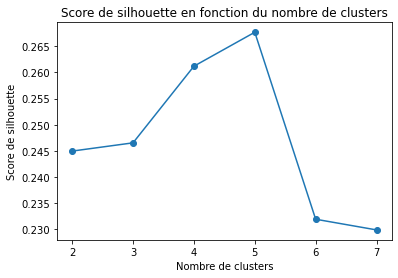

In [23]:
# Liste pour stocker les scores de silhouette
silhouette_scores = []

# plage de nombre de clusters à tester
range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Initialisez le modèle de clustering avec le nombre de clusters actuel
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Effectuez le clustering sur vos données
    cluster_labels = kmeans.fit_predict(X_scaled)
    # Calcule du score de silhouette
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# graphique du score de silhouette en fonction du nombre de clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.show()

## E-3 davies_bouldin_score

In [24]:
# Initialisez une liste pour stocker les valeurs du score de Davies-Bouldin pour différents nombres de clusters
db_scores = []

max_clusters = 6
# Parcourez différentes valeurs de nombre de clusters et calculez le score de Davies-Bouldin pour chaque valeur
for q in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=q, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db_score)

# Trouvez le nombre optimal de clusters qui minimise le score de Davies-Bouldin
optimal_clusters = np.argmin(db_scores) + 2  # +2 pour compenser le début à partir de 2 clusters

print(f"Le nombre optimal de clusters est : {optimal_clusters}")

Le nombre optimal de clusters est : 5


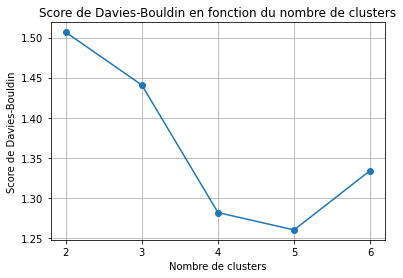

[1.5065553346936549,
 1.440667016246841,
 1.2818641983836248,
 1.260240862711716,
 1.3341820099638044]

In [25]:
# Tracer le score de Davies-Bouldin en fonction du nombre de clusters
plt.plot(range(2, max_clusters+1), db_scores, marker='o', linestyle='-')
plt.title('Score de Davies-Bouldin en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Davies-Bouldin')
plt.xticks(range(2, max_clusters+1))
plt.grid(True)
plt.show()
db_scores

### En se basant sur les différents modèles de clustering, nous determinons le nombre de cluster optimal à 5

# F- Affichage des clusters

In [26]:
# Création d'une instance de l'algorithme KMeans avec 5 clusters
kmeans = KMeans(n_clusters=5)

# Application de l'algorithme KMeans aux données X_scaled pour trouver les clusters
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [27]:
# Clusters :
kmeans.labels_

array([1, 0, 3, 0, 2, 4, 3, 3, 0, 3, 2, 2, 0, 3, 0, 3, 2, 0, 0, 0, 4, 0,
       3, 1, 0, 4, 3, 0, 1, 2, 0, 3, 0, 4, 0, 0, 3, 1, 2, 4, 3, 0, 2, 3,
       0, 0, 2, 2, 0, 4, 4, 4, 3, 0, 0, 4, 4, 0, 3, 4, 0, 0, 0, 0, 0, 4,
       2, 2, 2, 2, 3, 2, 0, 3, 1, 4, 3, 3, 4, 3, 0, 4, 2, 2, 3, 1, 0, 1,
       4, 1, 3, 0, 0, 4, 0, 4, 3, 1, 0, 4, 0, 1, 1, 2, 2, 0, 4, 1, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 3, 3, 3, 3, 4, 0,
       1, 3, 2, 1, 0, 2, 3, 2, 1, 4, 1, 2, 0, 4, 1, 3, 0, 0, 0, 0, 0, 4,
       0, 0, 1, 1, 1, 0, 2, 0, 2, 1])

In [28]:
#modification des id clusters
# Création d'un dictionnaire dd où les clés sont les entiers de 0 à 4 et les valeurs sont les lettres de "a" à "e"
dd = {i: j for i, j in enumerate(list("abcde"))}

# Création d'une liste de labels en utilisant le dictionnaire dd pour mapper 
# les labels attribués par KMeans à leurs correspondants lettres
labels = [dd[i] for i in kmeans.labels_]

# 10 premiers labels
labels[:10]

['b', 'a', 'd', 'a', 'c', 'e', 'd', 'd', 'a', 'd']

In [29]:
# Ajout des labels au df

df["cluster"] = labels
df.head(2)

,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population,cluster
pays,,,,,,,,,,
Afghanistan,AFG,530.15,97.7,2.08,-2.79,1.53,49.12,50.88,5.47,b
Afrique du Sud,ZAF,6723.93,84.4,3.75,-0.28,35.69,78.71,24.27,2.93,a


### F- 1 Visualisation des clusters sur la map monde



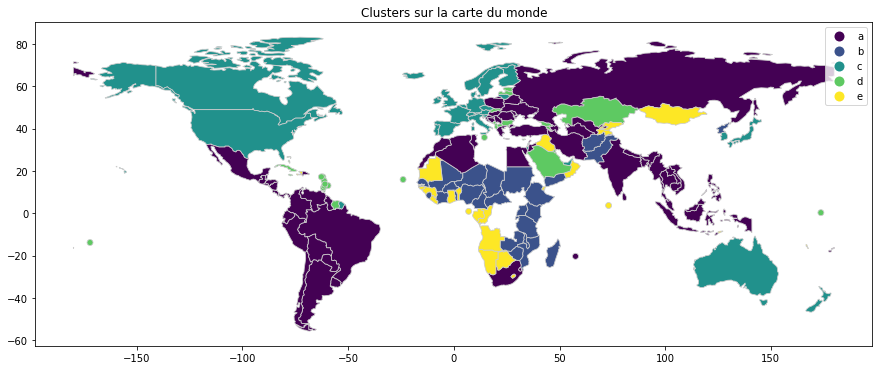

In [30]:
# Fusionner les données des clusters avec les données géographiques du monde
world = world.merge(df, how='left', left_on='iso_a3', right_on='code ISO3')

# Tracer la carte du monde
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
world.plot(column='cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Clusters sur la carte du monde')
plt.show()

### F-2 Affichage du nuage de points avec les 5 clusters et leur centroîdes grâce à l'algorithme Kmeans 

In [31]:
#Calcul des centroîdes 

def calculate_centroids(X_scaled, labels):
    centroids = []  # liste vide pour stocker les centroids
    unique_labels = np.unique(labels)  # Trouve les labels uniques dans les données de clustering
    for label in unique_labels:  # Pour chaque label unique
        # Sélection des points dans le cluster correspondant au label actuel
        cluster_points = X_scaled[labels == label]
        # Calcule du centroïde de ce cluster en prenant la moyenne de ses points
        centroid = np.mean(cluster_points, axis=0)
        # Ajout du centroïde calculé à la liste des centroïdes
        centroids.append(centroid)
    # Conversion de la liste de centroids en un tableau numpy 
    return np.array(centroids)

# Définit les données X comme étant X_scaled pour le clustering
X = X_scaled  
# Utilise les étiquettes de clusters attribuées par kmeans
labels = kmeans.labels_  
# Calcule les centroids en utilisant la fonction calculate_centroids
centroids = calculate_centroids(X, labels)

# centroids calculés
print("Centroids:", centroids)

Centroids: [[-0.34557719  0.47360216 -0.15205013 -0.23880908  0.04012194  0.57031636
  -0.65467721 -0.31298186]
 [-0.65386611 -1.60607777 -0.45648161 -1.14711646 -1.07390001  0.25604071
  -0.6831436   1.12029125]
 [ 1.87743112  0.62220313  1.69030139  0.98096658  0.53014154  0.52526839
   0.0131412  -0.63413442]
 [-0.03640895  0.5588639  -0.15128685  0.6481893   0.92742905 -0.93296791
   0.77834959 -0.64702732]
 [-0.52461602 -0.77989336 -0.85680791 -0.06698471 -0.65062234 -1.11923268
   1.36691923  1.03794989]]


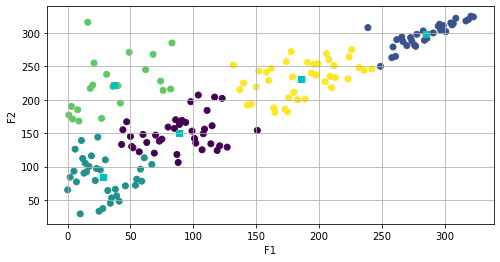

Inertie totale : 267164.5499703749


In [32]:
# Affichage des individus en cluster avec les centroids
fig, ax = plt.subplots(figsize=(8,4))  # Crée une figure et des axes
# Création d'une instance de l'algorithme KMeans avec 5 clusters et application aux données Z
model = KMeans(n_clusters=5)
model.fit(Z)

# Prédition des étiquettes des clusters pour les données Z
model.predict(Z)

# Affichage des points en utilisant les deux premières colonnes de Z comme coordonnées x et y

scatter = ax.scatter(Z[:, 0], Z[:, 1], c=model.predict(Z))

# Affichage des centroïdes des clusters
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='s', c='c')

plt.grid()
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

# Affiche l'inertie totale du modèle KMeans
print('Inertie totale :', model.inertia_)

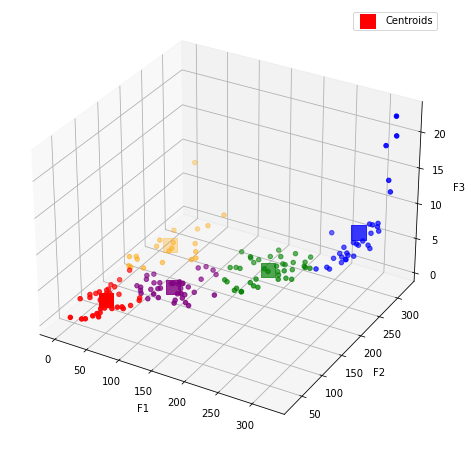

Inertie totale : 267164.5499703749


In [33]:
# Création d'une figure et d'axes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création d'un modèle KMeans avec 5 clusters
model = KMeans(n_clusters=5)

# Adaptation du modèle aux données et prédiction des clusters
model.fit(Z)
labels = model.predict(Z)

# Définition des couleurs personnalisées pour chaque cluster
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple', 5: 'brown'}

# Affichage des points avec leur cluster attribué
# les trois premières colonnes de Z comme coordonnées x,y et z
scatter = ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=[cluster_colors[label] for label in labels])

# Affichage des centroids avec leurs couleurs correspondantes
centroid_labels = model.predict(model.cluster_centers_)
centroid_colors = [cluster_colors[label] for label in centroid_labels]
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], 
           marker='s', c=centroid_colors, s=200, label='Centroids')

# Spécification des étiquettes des axes x, y et z
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')

# Affichage de la légende
ax.legend()

plt.show()

# Affichage de l'inertie totale du modèle
print('Inertie totale :', model.inertia_)

**Le nuage de points est étalé.
Le nombre de clusters est optimal et les centroîdes sont bien distants**

In [34]:
# Création du df cluster_counts qui, compte le nombre de pays par cluster

cluster_counts = df['cluster'].value_counts()

cluster_counts_df = pd.DataFrame(cluster_counts).reset_index()

# Renommage des colonnes
cluster_counts_df.columns = ['cluster', 'Nombre de pays']

cluster_counts_df

,cluster,Nombre de pays
0,a,58
1,d,29
2,c,27
3,b,26
4,e,24


In [35]:
df.reset_index(inplace=True)
df.head(2)
# La colonne cluster y est bien 

,pays,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population,cluster
0,Afghanistan,AFG,530.15,97.7,2.08,-2.79,1.53,49.12,50.88,5.47,b
1,Afrique du Sud,ZAF,6723.93,84.4,3.75,-0.28,35.69,78.71,24.27,2.93,a


In [36]:

# Création d'un dictionnaire pour stocker les DataFrames regroupés par cluster
cluster_dfs = {}

# Groupage des données par cluster
grouped = df.groupby('cluster')

# Parcout de chaque groupe et création d'un DataFrame pour chaque cluster
for cluster, data in grouped:
    cluster_dfs[cluster] = data.copy()

# Maintenant, cluster_dfs contient un DataFrame pour chaque cluster

In [37]:
# Liste pays  du cluster a
cluster_a = cluster_dfs["a"]
cluster_a['pays'].unique()

array(['Afrique du Sud', 'Algérie', 'Argentine', 'Azerbaïdjan',
       'Bangladesh', 'Belize', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Brésil', 'Bélarus', 'Cambodge', 'Chili',
       'Colombie', 'Costa Rica', 'Croatie', 'El Salvador', 'Eswatini',
       'Fidji', 'Fédération de Russie', 'Grèce', 'Guatemala', 'Guyana',
       'Honduras', 'Hongrie', 'Inde', 'Indonésie',
       "Iran (République islamique d')", 'Jordanie', 'Liban', 'Malaisie',
       'Maroc', 'Maurice', 'Mexique', 'Myanmar', 'Nicaragua', 'Népal',
       'Ouzbékistan', 'Panama', 'Paraguay', 'Philippines', 'Pologne',
       'Pérou', 'Roumanie', 'République de Moldova',
       'République dominicaine', 'République démocratique populaire lao',
       'Serbie', 'Sri Lanka', 'Thaïlande', 'Tunisie', 'Turkménistan',
       'Turquie', 'Ukraine', 'Uruguay',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Égypte',
       'Équateur'], dtype=object)

In [38]:
# Liste pays  du cluster b
cluster_b = cluster_dfs["b"]
cluster_b['pays'].unique()

array(['Afghanistan', 'Burkina Faso', 'Cameroun', "Côte d'Ivoire",
       'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger',
       'Nigéria', 'Ouganda', 'Pakistan', 'Rwanda',
       'République centrafricaine',
       'République populaire démocratique de Corée',
       'République-Unie de Tanzanie', 'Sierra Leone', 'Soudan', 'Sénégal',
       'Tchad', 'Togo', 'Yémen', 'Zambie', 'Zimbabwe', 'Éthiopie'],
      dtype=object)

In [39]:
# Liste pays  du cluster c
cluster_c = cluster_dfs["c"]
cluster_c['pays'].unique()

array(['Allemagne', 'Australie', 'Autriche', 'Belgique', 'Canada',
       'Danemark', 'Espagne', 'Finlande', 'France', 'Irlande', 'Islande',
       'Israël', 'Italie', 'Japon', 'Lituanie', 'Luxembourg', 'Norvège',
       'Nouvelle-Zélande', 'Portugal',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République de Corée', 'Slovénie', 'Suisse', 'Suède', 'Tchéquie',
       'Émirats arabes unis', "États-Unis d'Amérique"], dtype=object)

In [40]:
# Liste pays  du cluster d
cluster_d = cluster_dfs["d"]
cluster_d['pays'].unique()

array(['Albanie', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Arménie',
       'Bahamas', 'Barbade', 'Bulgarie', 'Cabo Verde', 'Chypre', 'Cuba',
       'Dominique', 'Estonie', 'Grenade', 'Géorgie', 'Jamaïque',
       'Kazakhstan', 'Kiribati', 'Koweït', 'Lettonie',
       'Macédoine du Nord', 'Malte', 'Monténégro', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Slovaquie', 'Suriname', 'Trinité-et-Tobago'], dtype=object)

In [41]:
# Liste pays  du cluster e
cluster_e = cluster_dfs["e"]
cluster_e['pays'].unique()

array(['Angola', 'Botswana', 'Bénin', 'Congo', 'Djibouti', 'Gabon',
       'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Iraq',
       'Kirghizistan', 'Lesotho', 'Libéria', 'Maldives', 'Mauritanie',
       'Mongolie', 'Namibie', 'Oman', 'Sao Tomé-et-Principe',
       'Tadjikistan', 'Timor-Leste', 'Vanuatu'], dtype=object)

# G-  Etude de la cohérence des clusters

## G-1 Test D'ANOVA

In [42]:
# Modèle ANOVA
model = ols('TDI ~ C(cluster)', data=df).fit()

# Tableau ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(cluster),196627.776523,4.0,61.178403,3.312138e-31
Residual,127756.752677,159.0,NaN,NaN


### Interprétation 

L'effet du cluster sur la variable dépendante est **statistiquement significatif**, car la valeur p associée à l'effet du cluster (PR(>F)) est très faible (3.312138e-31 << 0.05).

De plus, la **valeur F** (61.178403) est élevée, ce qui indique une grande différence entre les moyennes des groupes par rapport à la variance à l'intérieur des groupes. Cela renforce l'idée que l'effet du cluster est important.

En conclusion, ces résultats montrent qu'il existe des **différences significatives entre les clusters** en ce qui concerne cette mesure, ce qui valide l'impact des clusters sur la variable dépendante analysée.


## G-2 Calcul des distances  
**Entre les centroids et entre les points de données à l'intérieur de chaque cluster**

In [43]:
def compute_compactness_separation(X, labels, centroids):
    # Calcul des distances entre les points de données à l'intérieur de chaque cluster
    compactness = 0
    for cluster_label in np.unique(labels):
        cluster_points = X[labels == cluster_label]
        centroid = centroids[cluster_label]
        compactness += np.sum(pairwise_distances(cluster_points, [centroid]))
    
    # Calcul de la séparation entre les clusters (distances entre les centroids)
    separation = pairwise_distances(centroids, centroids).sum() - np.trace(pairwise_distances(centroids, centroids))
    
    return compactness, separation

# Exemple d'utilisation avec des données X, des étiquettes de cluster et les centroids des clusters
X = X_scaled  # Vos données (matrice de caractéristiques)
labels = kmeans.labels_ # Les étiquettes de cluster attribuées à chaque point de données
centroids = centroids  # Les centroids (ou centres) de chaque cluster

compactness, separation = compute_compactness_separation(X, labels, centroids)
print("Compactness:", compactness)
print("Separation:", separation)

Compactness: 280.1077430297496
Separation: 71.01372499567556


**La valeur de compacité élevée (280.11) suggère une cohésion interne forte des clusters, avec des points de données proches les uns des autres. Cependant, la séparation relativement faible entre les centroids (71.01) indique une certaine similitude entre les clusters tout en conservant leur distinctivité.**

## G-3 Score moyen de silhouette

Analyse de la cohérence du cluster 

In [44]:
def cluster_coherence(X, n_clusters, n_bootstrap=100):
    scores = []
    for _ in range(n_bootstrap):
        # Rééchantillonnage des données
        X_bootstrap = resample(X, replace=True)
        
        # Initialisation du modèle de clustering
        kmeans = KMeans(n_clusters=n_clusters)
        
        # Ajustement du modèle aux données rééchantillonnées
        kmeans.fit(X_bootstrap)
        
        # Calcul du score de silhouette pour évaluer la cohérence du clustering
        score = silhouette_score(X_bootstrap, kmeans.labels_)
        scores.append(score)
    
    return scores

X = X_scaled   
n_clusters =5  # Nombre de clusters
scores = cluster_coherence(X, n_clusters)

# Affichage des scores de silhouette p
print("Scores de silhouette :", scores)

print("Score moyen :", np.mean(scores))

Scores de silhouette : [0.294813837115056, 0.32305992591920357, 0.28780600674690265, 0.3269070861754532, 0.3191008392331255, 0.2817404142581937, 0.32605307063284417, 0.30128753357982946, 0.32828148481413283, 0.298768958730329, 0.31194018210904556, 0.26455691370572576, 0.27187445710368174, 0.3055734756481791, 0.27813878296724465, 0.3094854011390588, 0.27423132150835383, 0.2899558082203566, 0.29489986507336946, 0.2595317181505726, 0.2484332665371987, 0.3072197509965944, 0.2855934392069921, 0.2919422710961635, 0.26559078973498956, 0.2551673281161843, 0.31017219644102245, 0.2881200918887507, 0.2915017067518473, 0.3323603636066075, 0.30421076877979836, 0.29279209593363936, 0.281475289577558, 0.2874645872206601, 0.32661998420133503, 0.2893553366895858, 0.26595028107786894, 0.2557056996835901, 0.31087569465259723, 0.2842801313701158, 0.2916340331594928, 0.30727267325086555, 0.30176116113979057, 0.23503718867584752, 0.2869145328067514, 0.2941661271092096, 0.26948990341497076, 0.311901625199434

**le score moyen de silhouette a 0.29 suggère une cohérence raisonnable des clusters sur l'ensemble des rééchantillonnages.**


### Conclusion

Les clusters obtenus sont relativement **stables et cohérents**, ce qui renforce la validité de nos résultats de clustering. La stabilité des clusters suggère que les groupes identifiés sont robustes et peuvent être utilisés pour tirer des conclusions significatives concernant les pays à cibler pour l'exportation de produits, tout en réduisant les risques d'erreur dans la segmentation.

Ces résultats apportent une base solide pour des décisions stratégiques et permettent de cibler les marchés internationaux de manière plus précise et fiable.


# H-Analyse des clusters

## H-1 Comparaison de la moyenne de chaque variable entre clusters 

In [45]:
# Calcul de la moyenne des variables des cluster afin d'avoir une vision agrégée des caractéristiques 
#socio-économiques des pays regroupés dans chaque cluster.

# Utilisation de la fonction groupby pour regrouper par cluster et calculer la moyenne de chaque colonne
df_means = round (df.groupby('cluster').mean(),2)

# Réinitialisation de l'index pour que 'cluster' devienne une colonne à part entière
df_means.reset_index(inplace=True)
#df_means=df_means.drop(columns=[ "index"])


df_means

,cluster,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
0,a,6741.54,96.20,2.81,-0.31,20.34,104.22,12.69,1.90
1,b,1047.87,43.04,2.64,-1.12,2.92,90.14,11.43,5.26
2,c,47797.42,100.00,3.84,0.77,28.00,102.20,42.40,1.15
3,d,12451.45,98.38,2.81,0.48,34.21,36.90,76.43,1.12
4,e,3434.94,64.16,2.42,-0.16,9.54,28.56,102.60,5.06


## H-2 Croisements entre les clusters de pays et les variables
**Heatmap**

<Figure size 720x576 with 0 Axes>

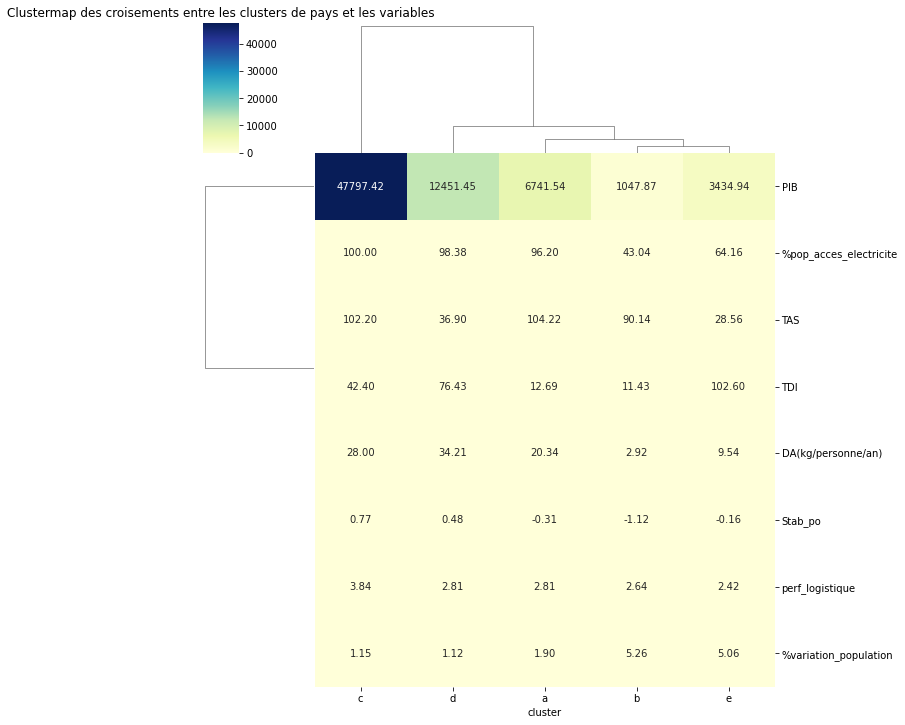

In [46]:
# Réorganisation des données 
df_means.set_index('cluster', inplace=True)
df_means = df_means.transpose()

# Création de la clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(df_means, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Clustermap des croisements entre les clusters de pays et les variables')
plt.show()

## H-3 Comparaison des fonctionnalités  des différentes variables entre les clusters

**Calcul des statistiques pour chaque cluster**

In [47]:
def boxplot_stats(data, cluster_column):
    # Exclusion des colonnes non numériques et celle des clusters
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    exclude_columns = ['pays', 'code_ISO3', cluster_column]
    
    # Création un sous-ensemble de données avec les colonnes numériques
    numeric_data = data[numeric_columns]
    
    # Création un DataFrame pour stocker les résultats
    results = pd.DataFrame()
    
    # Boucle sur chaque variable à analyser
    for column in numeric_data.columns:
        if column != cluster_column:  # Exclusion de la colonne des clusters
            # Calcul des statistiques descriptives pour chaque cluster
            stats = numeric_data.groupby(data[cluster_column])[column].describe()
            # Ajout des résultats au DataFrame
            results[column] = stats['mean']
            results[column + '_std'] = stats['std']
            results[column + '_min'] = stats['min']
            results[column + '_25%'] = stats['25%']
            results[column + '_50%'] = stats['50%']
            results[column + '_75%'] = stats['75%']
            results[column + '_max'] = stats['max']
    
    return results

# Utilisation de la fonction avec le df
result_df = boxplot_stats(df, 'cluster')
result_df.transpose()

cluster,a,b,c,d,e
PIB,6741.540172,1047.871154,47797.422222,12451.448966,3434.941250
PIB_std,4529.733469,635.226652,21086.895888,8377.682951,3909.972683
PIB_min,1044.690000,414.740000,16443.300000,1563.470000,576.030000
PIB_25%,3294.140000,550.700000,35811.680000,5353.780000,1086.932500
PIB_50%,5939.485000,791.505000,44162.260000,9107.700000,1909.250000
PIB_75%,9781.135000,1490.592500,57659.500000,17843.200000,4213.307500
PIB_max,18769.790000,3000.820000,110203.010000,30969.880000,17802.550000
%pop_acces_electricite,96.201724,43.044615,100.000000,98.381034,64.162083
%pop_acces_electricite_std,6.481021,23.627189,0.000000,3.555148,26.244662
%pop_acces_electricite_min,69.810000,10.900000,100.000000,85.670000,24.200000


**Boîte à moustaches  comparant les fonctionnalités  des différentes variables entre les clusters**

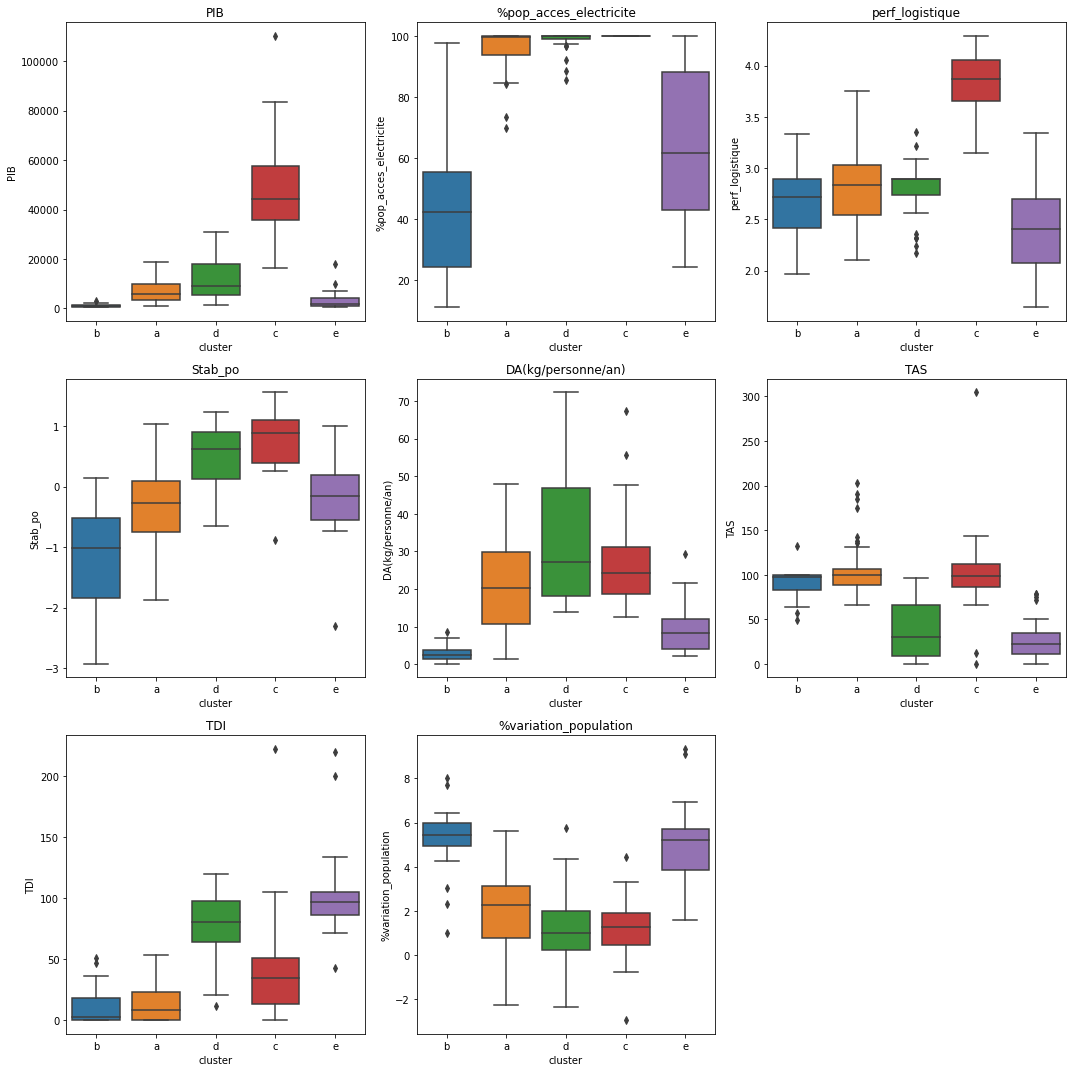

In [48]:
def plot_boxplots(data, cluster_column):
    # Exclusion des colonnes non numériques et la colonne des clusters
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    exclude_columns = ['pays', 'code_ISO3', cluster_column]
    
    # Création un sous-ensemble de données avec les colonnes numériques
    numeric_data = data[numeric_columns]
    
    # Configuration de la taille de la figure
    num_variables = len(numeric_data.columns)
    num_rows = (num_variables // 3) + (1 if num_variables % 3 != 0 else 0)
    plt.figure(figsize=(15, 5*num_rows))
    
    # Boucle sur chaque variable à afficher en boxplot
    for i, column in enumerate(numeric_data.columns):
        if column != cluster_column:  # Exclusion de la colonne des clusters
            plt.subplot(num_rows, 3, i + 1)  # Ajout d'une sous-trame pour chaque variable
            sns.boxplot(x=data[cluster_column], y=numeric_data[column])
            plt.title(column)  

    plt.tight_layout()  # Ajustement automatique des sous-graphiques
    plt.show()


plot_boxplots(df, 'cluster')

## H-4 Interprétations

### Cluster A (Économiquement stable avec stabilité politique modérée et accès généralisé à l'électricité)
Ce cluster se caractérise par un **PIB moyen-élevé**, une **stabilité politique modérée**, un **accès généralisé à l'électricité** et des niveaux modérés de logistique et de distribution alimentaire. Les pays de ce groupe affichent une certaine prospérité économique, bien que leur stabilité politique puisse varier légèrement. Ils bénéficient d'un accès généralisé à l'électricité et maintiennent des niveaux de distribution alimentaire et de logistique relativement stables.

### Cluster B (Fragiles avec faible développement économique et instabilité politique)
Les pays de ce cluster ont un **PIB relativement bas**, une **stabilité politique faible**, un **accès limité à l'électricité** et des niveaux modérés à faibles de logistique et de distribution alimentaire. Ces pays sont confrontés à des défis économiques et politiques majeurs, avec une faible disponibilité d'électricité et des niveaux de logistique et de distribution alimentaire qui entravent leur développement et leur stabilité sociale.

### Cluster C (Prospères avec économie forte et stabilité politique)
Ce cluster regroupe des pays avec un **PIB élevé**, une **stabilité politique forte**, un **accès généralisé à l'électricité** et des **niveaux élevés de logistique et de distribution alimentaire**. Ces pays affichent une prospérité économique et une stabilité politique solides, favorisant leur développement durable et leur positionnement sur la scène internationale. De plus, leur infrastructure logistique et leur accès à la distribution alimentaire sont bien développés.

### Cluster D (Stables mais dépendants des importations)
Les pays de ce cluster ont un **PIB moyen-élevé**, une **stabilité politique modérée**, un **accès généralisé à l'électricité** et des **niveaux modérés à élevés de logistique et de distribution alimentaire**. Bien qu'ils bénéficient d'une certaine prospérité économique et d'une stabilité politique relative, leur **dépendance aux importations** les rend vulnérables aux fluctuations des marchés internationaux et aux politiques commerciales des autres pays.

### Cluster E (Diversifiés avec variabilité économique et dépendance aux importations)
Ce cluster se caractérise par une **variabilité économique**, avec un **PIB variable**, une forte **dépendance aux importations**, un **accès généralisé à l'électricité** et des niveaux variables de logistique et de distribution alimentaire. Les fluctuations économiques et politiques sont courantes dans ces pays, mais ils maintiennent une disponibilité alimentaire relativement élevée malgré leur dépendance aux importations pour certains produits.


# I - PCA du cluster c
**Objectif , explorer en profondeur les caractéristiques spécifiques du cluster c**

In [49]:
cluster_c.set_index("pays", inplace=True)
cluster_c

,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population,cluster
pays,,,,,,,,,,
Allemagne,DEU,44670.22,100.0,4.26,0.57,19.47,87.06,48.42,1.06,c
Australie,AUS,57430.80,100.0,3.76,0.88,47.65,108.37,1.37,2.72,c
Autriche,AUT,47429.54,100.0,4.29,1.03,18.20,85.55,63.58,1.63,c
Belgique,BEL,44162.26,100.0,4.11,0.42,12.65,304.61,222.37,1.17,c
Canada,CAN,45125.11,100.0,3.87,1.09,39.02,98.88,12.70,1.96,c
Danemark,DNK,57888.20,100.0,3.92,0.85,28.98,103.59,79.64,0.77,c
Espagne,ESP,28190.81,100.0,3.78,0.27,30.39,101.20,13.69,-0.05,c
Finlande,FIN,46412.76,100.0,4.09,1.06,18.76,116.22,14.41,0.55,c
France,FRA,40458.15,100.0,3.90,0.27,22.90,111.25,32.17,0.60,c


In [50]:
cluster_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Allemagne to États-Unis d'Amérique
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code ISO3               27 non-null     object 
 1   PIB                     27 non-null     float64
 2   %pop_acces_electricite  27 non-null     float64
 3   perf_logistique         27 non-null     float64
 4   Stab_po                 27 non-null     float64
 5   DA(kg/personne/an)      27 non-null     float64
 6   TAS                     27 non-null     float64
 7   TDI                     27 non-null     float64
 8   %variation_population   27 non-null     float64
 9   cluster                 27 non-null     object 
dtypes: float64(8), object(2)
memory usage: 2.3+ KB


In [51]:
cluster_c.head()

,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population,cluster
pays,,,,,,,,,,
Allemagne,DEU,44670.22,100.0,4.26,0.57,19.47,87.06,48.42,1.06,c
Australie,AUS,57430.80,100.0,3.76,0.88,47.65,108.37,1.37,2.72,c
Autriche,AUT,47429.54,100.0,4.29,1.03,18.20,85.55,63.58,1.63,c
Belgique,BEL,44162.26,100.0,4.11,0.42,12.65,304.61,222.37,1.17,c
Canada,CAN,45125.11,100.0,3.87,1.09,39.02,98.88,12.70,1.96,c


In [52]:
cluster_c.describe()

,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population
count,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,47797.422222,100.0,3.837037,0.772593,27.999259,102.199630,42.395556,1.147778
std,21086.895888,0.0,0.297500,0.499666,13.110258,51.370196,46.752002,1.403962
min,16443.300000,100.0,3.150000,-0.890000,12.650000,0.000000,0.000000,-2.950000
25%,35811.680000,100.0,3.655000,0.400000,18.630000,85.745000,13.195000,0.455000
50%,44162.260000,100.0,3.870000,0.880000,24.410000,99.020000,34.870000,1.260000
75%,57659.500000,100.0,4.060000,1.095000,31.260000,111.680000,51.040000,1.910000
max,110203.010000,100.0,4.290000,1.560000,67.390000,304.610000,222.370000,4.440000


## I-1 Standardisation des données

In [53]:
Y =cluster_c.values
type(Y)

numpy.ndarray

In [54]:
Y.shape

(27, 10)

In [55]:
# Sélection des colonnes numériques
numeric_cols = cluster_c.select_dtypes(include=['number']).columns
Y = cluster_c[numeric_cols]
y_names = cluster_c.index
y_features = numeric_cols
#Scaling
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)
Y_scaled[:5]

array([[-0.15112577,  0.        ,  1.44880699, -0.41317971, -0.66297213,
        -0.30033036,  0.13131429, -0.06371245],
       [ 0.46554444,  0.        , -0.26388078,  0.21905323,  1.5274355 ,
         0.12240389, -0.89423047,  1.14117876],
       [-0.01777835,  0.        ,  1.55156826,  0.52497239, -0.76168816,
        -0.33028478,  0.4617555 ,  0.35001525],
       [-0.17567354,  0.        ,  0.93500066, -0.71909887, -1.19308498,
         4.01528842,  3.92288734,  0.01612974],
       [-0.12914267,  0.        ,  0.11291053,  0.64734005,  0.85663288,
        -0.06585271, -0.64727145,  0.58954182]])

In [56]:
y_names

Index(['Allemagne', 'Australie', 'Autriche', 'Belgique', 'Canada', 'Danemark',
       'Espagne', 'Finlande', 'France', 'Irlande', 'Islande', 'Israël',
       'Italie', 'Japon', 'Lituanie', 'Luxembourg', 'Norvège',
       'Nouvelle-Zélande', 'Portugal',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'République de Corée', 'Slovénie', 'Suisse', 'Suède', 'Tchéquie',
       'Émirats arabes unis', 'États-Unis d'Amérique'],
      dtype='object', name='pays')

In [57]:
y_features

Index(['PIB', '%pop_acces_electricite', 'perf_logistique', 'Stab_po',
       'DA(kg/personne/an)', 'TAS', 'TDI', '%variation_population'],
      dtype='object')

In [58]:
# Vérification moyenne et ecart type
idy = ["mean", "std"]

pd.DataFrame(Y_scaled).describe().round(2).loc[idy, :]

,0,1,2,3,4,5,6,7
mean,0.00,0.0,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.02,0.0,1.02,1.02,1.02,1.02,1.02,1.02


## I-2 PCA des **6 premières composantes**

In [59]:
# travaillons sur les 6 premières composantes :
n_components = 6
pca = PCA(n_components=n_components) # on instancie l'ACP
pca.fit(Y_scaled)# On l'entraine sur les données scalées 


PCA(n_components=6)

In [60]:
#Variance captée par chaque nouvelle composante.
pca.explained_variance_ratio_

array([0.30910084, 0.25375474, 0.19529179, 0.12243115, 0.05097006,
       0.04411951])

In [61]:
# Enregistrement de du resultat de la variance captée dans la variable screnn
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round() # cumul
scree_cum

array([31., 56., 76., 88., 93., 98.])

In [62]:
# Création d'une variable avec la liste des composantes
y_list = range(1, n_components+1)
list(y_list)

[1, 2, 3, 4, 5, 6]

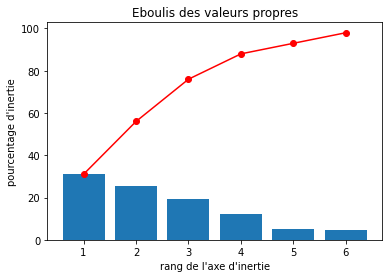

In [63]:
# Visualisation graphique 
plt.bar(y_list, scree)
plt.plot(y_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

#### 88% de la variance est comprise dans les 4 premières composantes. Nous allons donc faire une PCA  de ses derniers.

## I-3 PCA des **4 premières composantes**

In [64]:
# travaillons sur les 4 premières composantes :
n_components = 4
pca = PCA(n_components=n_components) # on instancie l'ACP
pca.fit(Y_scaled)# On l'entraine sur les données scalées 
pca.explained_variance_ratio_

array([0.30910084, 0.25375474, 0.19529179, 0.12243115])

In [65]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree_cum

array([31., 56., 76., 88.])

In [66]:
y_list = range(1, n_components+1)
list(y_list)

[1, 2, 3, 4]

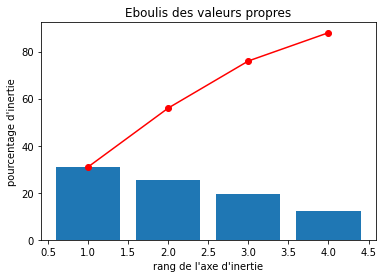

In [67]:
# Visualisation graphique 
plt.bar(y_list, scree)
plt.plot(y_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

#### 80% de la variance est comprise dans les 3 premières composantes

## I- 4 Analyse 
### I- 4 - a Components

In [68]:
pcs = pca.components_ # pcs contient les composantes principales
pcs = pd.DataFrame(pcs)
pcs.columns = y_features
pcs.index = [f"F{i}" for i in y_list]
pcs.T.round(2) # transposition des données et arrondit des valeurs pour plus de lisibilité

,F1,F2,F3,F4
PIB,0.60,0.02,-0.08,0.32
%pop_acces_electricite,0.00,-0.00,-0.00,0.00
perf_logistique,0.31,0.24,0.46,-0.60
Stab_po,0.22,0.32,-0.64,0.12
DA(kg/personne/an),-0.04,-0.64,0.26,0.22
TAS,-0.39,0.30,0.28,0.56
TDI,0.11,0.54,0.42,0.25
%variation_population,0.57,-0.22,0.21,0.30


<AxesSubplot:>

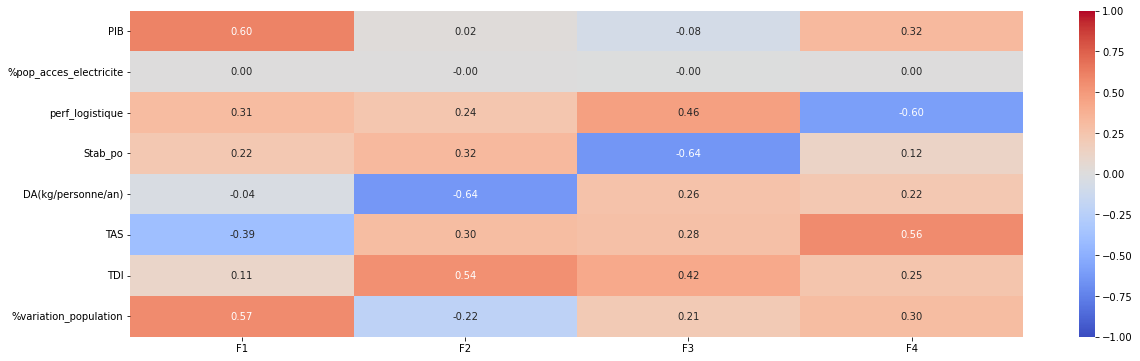

In [69]:
# Représentation visuelle
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### I- 4 - b  graphique des contributions des variables à chaque composante principale

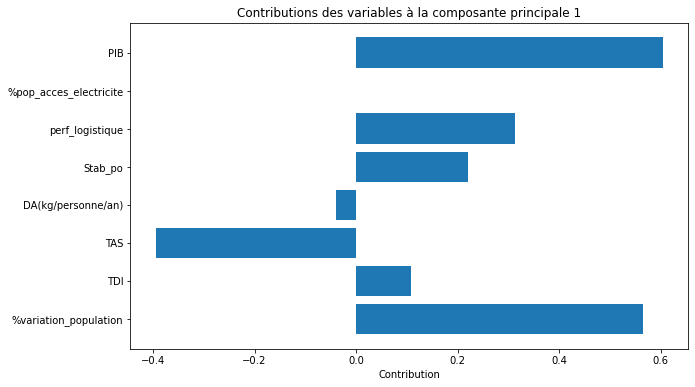

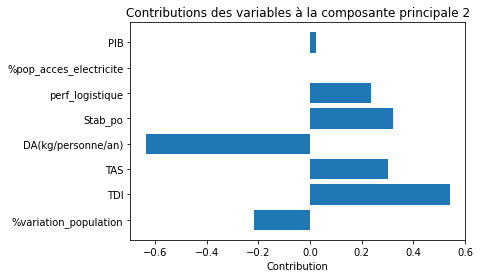

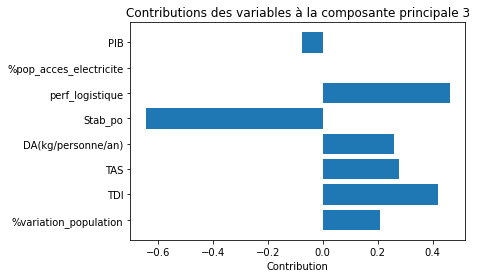

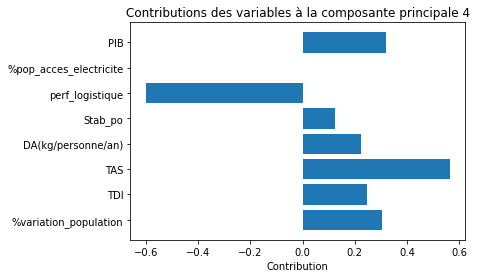

In [70]:
def plot_pca_contrib(pca, labels=features):
    components = pca.components_
    n_components = pca.n_components_
    n_features = pca.n_features_

    plt.figure(figsize=(10, 6))

    for i in range(n_components):
        plt.barh(range(n_features), components[i], align='center')
        plt.xlabel("Contribution")
        plt.title("Contributions des variables à la composante principale {}".format(i+1))
        if labels is None:
            plt.yticks(range(n_features), ["Var{}".format(i+1) for i in range(n_features)])
        else:
            plt.yticks(range(n_features), labels)
        plt.gca().invert_yaxis()  # Inversion de l'axe y pour que les variables les plus importantes soient en haut
        plt.show()


plot_pca_contrib(pca)

In [71]:
def dimdesc(pca, variable_names, n_top_variables=3):
    components = pca.components_
    explained_variance_ratio = pca.explained_variance_ratio_
    n_components = pca.n_components_
    n_features = pca.n_features_

    variable_dict = {i: name for i, name in enumerate(variable_names)}

    important_variables = []
    for i in range(n_components):
        component_vars = [(variable_dict[j], components[i, j] ** 2 * explained_variance_ratio[i]) for j in range(n_features)]
        component_vars.sort(key=lambda x: x[1], reverse=True)
        top_vars = component_vars[:n_top_variables]
        important_variables.append(top_vars)

    return important_variables
# Utilisation de la fonction avec votre objet PCA et les noms de vos variables
variable_names = y_features
top_variables = dimdesc(pca, variable_names, n_top_variables=5)
print("Variables les plus importantes pour chaque composante principale :")
for i, vars in enumerate(top_variables):
    print("Composante principale", i+1, ":")
    for var, importance in vars:
        print(var, ":", importance.round(3))

Variables les plus importantes pour chaque composante principale :
Composante principale 1 :
PIB : 0.113
%variation_population : 0.099
TAS : 0.048
perf_logistique : 0.03
Stab_po : 0.015
Composante principale 2 :
DA(kg/personne/an) : 0.103
TDI : 0.075
Stab_po : 0.026
TAS : 0.023
perf_logistique : 0.014
Composante principale 3 :
Stab_po : 0.081
perf_logistique : 0.042
TDI : 0.034
TAS : 0.015
DA(kg/personne/an) : 0.013
Composante principale 4 :
perf_logistique : 0.044
TAS : 0.039
PIB : 0.013
%variation_population : 0.011
TDI : 0.007


In [72]:
# 1. Utilisation des variables les plus importantes
variable_names = y_features
top_variables = dimdesc(pca, variable_names, n_top_variables=5)

# 2. Fixation d'un seuil d'importance
seuil_importance = 0.05

# 3. Élimination des variables moins importantes
variables_selectionnees = []
for vars in top_variables:
    for var, importance in vars:
        if importance > seuil_importance:
            variables_selectionnees.append(var)

variables_selectionnees

['PIB', '%variation_population', 'DA(kg/personne/an)', 'TDI', 'Stab_po']

### I- 4 - c  Cercle de corélation

In [73]:

def correlation_graph(pca, 
                      x_y, 
                      y_features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                y_features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

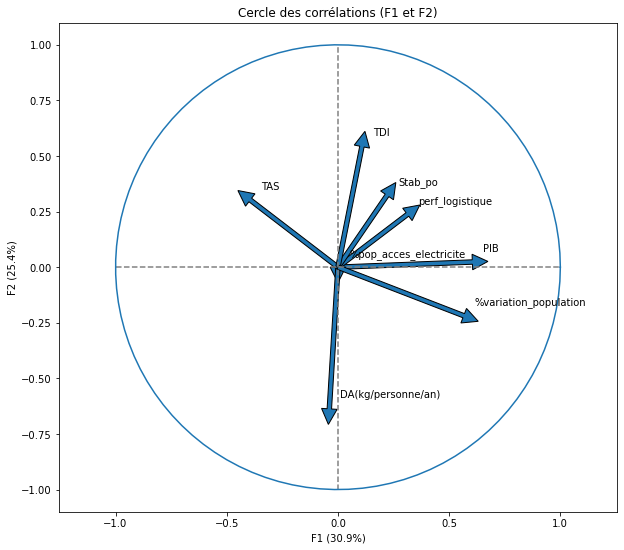

In [74]:
x_y = (0,1)
correlation_graph(pca, x_y, y_features)

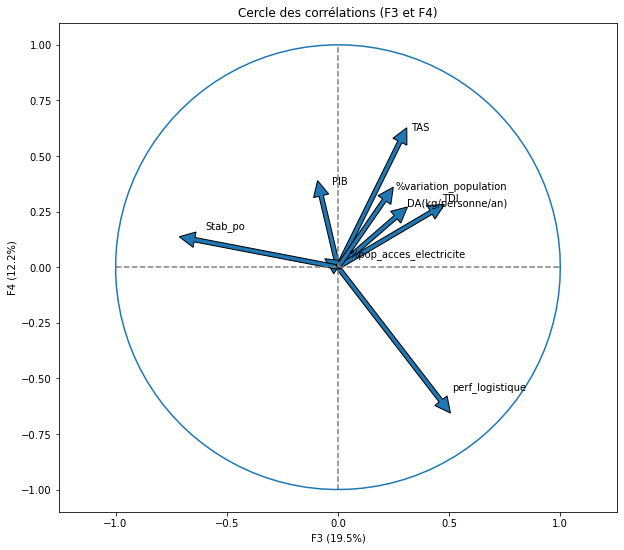

In [75]:
x_y = (2,3)
correlation_graph(pca, x_y, y_features)

### I- 4 - d  Projection

In [76]:
x_y = (0,1)
Y_proj = pca.transform(Y_scaled)
Y_proj[:5]

array([[ 3.92133048e-01,  6.23490824e-01,  7.34461707e-01,
        -1.27507153e+00],
       [ 6.88874132e-01, -1.65114893e+00, -3.70867279e-03,
         8.71622981e-01],
       [ 9.97168210e-01,  1.09671546e+00,  3.57912778e-01,
        -1.01054495e+00],
       [-1.07818556e+00,  4.08250524e+00,  3.36480312e+00,
         2.26301722e+00],
       [ 3.56551167e-01, -8.12446362e-01, -2.99066511e-01,
         1.44655880e-01]])

In [77]:
def display_factorial_planes(   Y_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    Y_projected : np.array, .DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque 
    composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme Y_projected en np.array
    Y_ = np.array(Y_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= Y_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   Y_[:, x],Y_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=Y_[:, x], y=Y_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(Y_[:, x]).max() *1.1
    y_max = np.abs(Y_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)
    
    # Affichage des labels des points
    if len(labels) : 
        
        for i,(_x,_y) in enumerate(Y_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

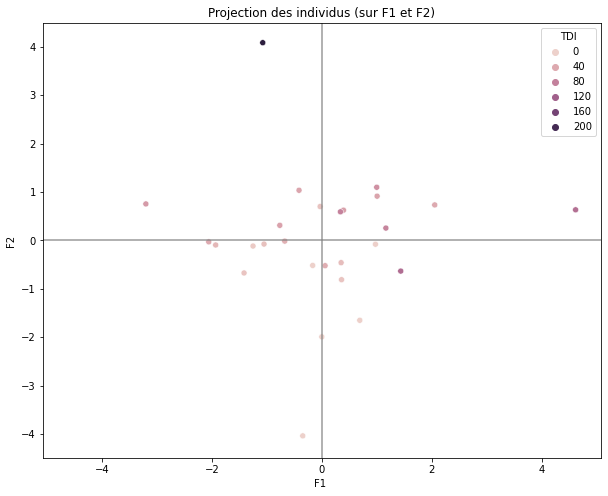

In [78]:
x_y = [0,1]
display_factorial_planes(Y_proj, x_y, clusters=cluster_c['TDI'])

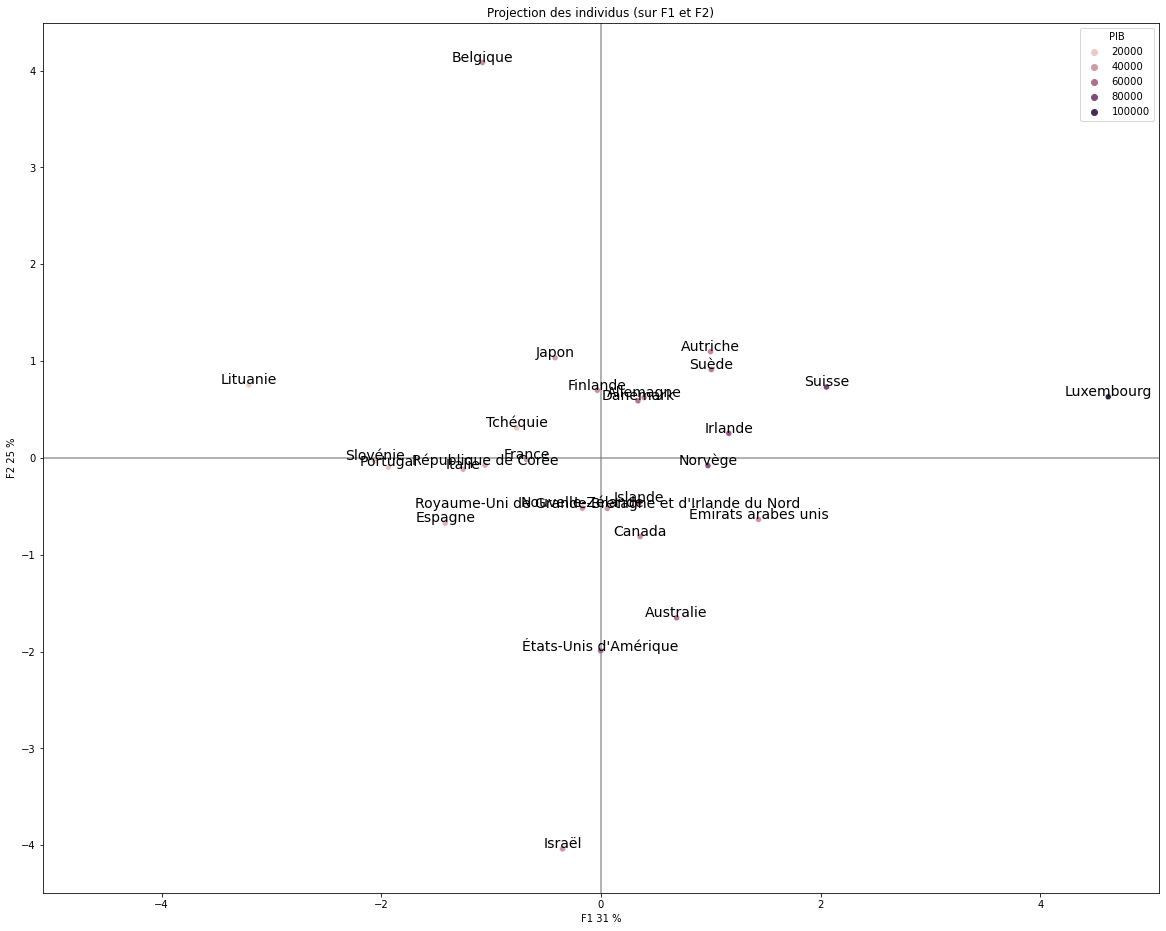

In [79]:
x_y = [0,1]
display_factorial_planes(Y_proj, x_y, pca, labels=y_names, figsize=(20,16), clusters=cluster_c['PIB'], marker="o")

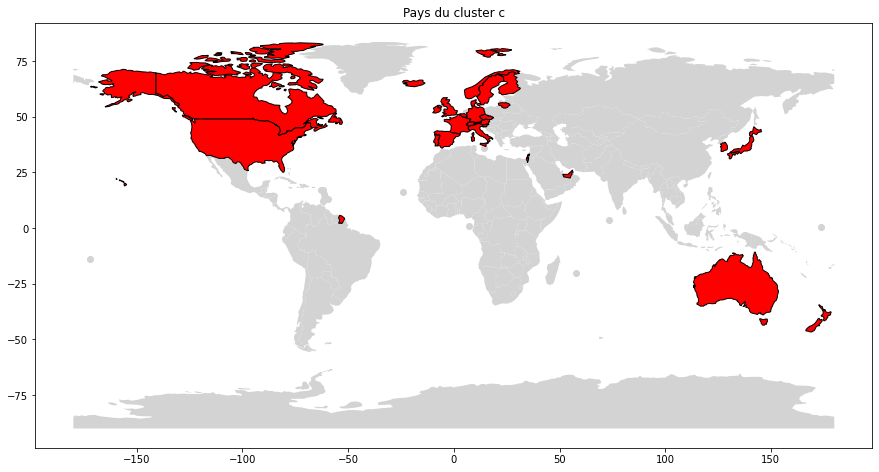

In [80]:

# Filtrer des données pour inclure uniquement nos pays 
pays_a_afficher2 = cluster_c['code ISO3'].unique()
world_subset2 = world[world['iso_a3'].isin(pays_a_afficher2)]


# Carte du monde avec les pays du df
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
world_subset2.plot(ax=ax, color='red', edgecolor='black')
plt.title('Pays du cluster c')
plt.show()



## I- 5 Interprétation des Composantes Principales (F1 à F4)

### Composante F1
- **Caractéristiques principales** : 
   - Forte corrélation positive avec le **PIB** (0.60) et le **pourcentage de variation de la population** (0.57).
   - Corrélation modérée avec la **stabilité politique** (0.22).

- **Interprétation** : 
   Cette composante semble être liée au développement économique et à la croissance de la population. Les pays ayant des PIB élevés et une croissance démographique importante seront positionnés positivement sur cette composante.

### Composante F2
- **Caractéristiques principales** : 
   - Forte corrélation négative avec la **disponibilité alimentaire par personne** (-0.64) et le **taux d'autosuffisance alimentaire** (-0.39).
   - Corrélation modérée avec le **pourcentage de la population ayant accès à l'électricité** (-0.00) et le **taux de dépendance aux importations** (0.54).

- **Interprétation** : 
   Cette composante semble représenter la situation alimentaire des pays. Les pays avec une faible disponibilité alimentaire par personne et un faible taux d'autosuffisance alimentaire seront positionnés négativement sur cette composante.

### Composante F3
- **Caractéristiques principales** : 
   - Forte corrélation positive avec la **performance logistique** (0.46) et le **taux de dépendance aux importations** (0.42).
   - Corrélation modérée avec la **stabilité politique** (-0.64).

- **Interprétation** : 
   Cette composante semble être liée à l'efficacité logistique et à la dépendance aux importations. Les pays avec une meilleure performance logistique et une forte dépendance aux importations seront positionnés positivement sur cette composante.

### Composante F4
- **Caractéristiques principales** : 
   - Forte corrélation négative avec la **performance logistique** (-0.60) et corrélation positive avec le **taux d'autosuffisance alimentaire** (0.56).
   - Corrélation modérée avec le **PIB** (0.32) et le **pourcentage de variation de la population** (0.30).

- **Interprétation** : 
   Cette composante semble représenter un aspect de l'autosuffisance alimentaire et de la performance logistique. Les pays avec une meilleure performance logistique et un plus faible besoin d'importations alimentaires seront positionnés négativement sur cette composante.


# J- Recommandations- Choix des Pays

Nous choisissons les pays ayant une forte corrélation avec la composante F1, indiquant un bon potentiel économique et une croissance démographique favorable pour l'exportation de nos produits :

- **Pays sélectionnés** : **Autriche, Suède, Suisse, Irlande, Allemagne, Danemark, et Luxembourg.**

Nous conseillons de privilégier l'Autriche, l'Irlande, l'Allemagne, la Finlande, le Danemark et le Luxembourg, car ils font partie de l'Union européenne. Ces pays partagent des normes et une monnaie commune avec la France, ce qui facilite les échanges commerciaux. De plus, leur proximité géographique permettrait de réduire l'empreinte carbone liée au transport.


In [81]:
# Liste des pays cibles 
liste_pays_cible = ['Autriche', 'Suède', 'Suisse', 'Irlande', 'Allemagne',"Finlande", 'Danemark', 'Luxembourg']

cluster_c.reset_index(drop=False, inplace=True)

# Sélection des lignes correspondant aux pays cibles dans le DataFrame cluster_c
pays_cible = cluster_c[cluster_c['pays'].isin(liste_pays_cible)]

# Affichage des pays cibles
pays_cible

,pays,code ISO3,PIB,%pop_acces_electricite,perf_logistique,Stab_po,DA(kg/personne/an),TAS,TDI,%variation_population,cluster
0,Allemagne,DEU,44670.22,100.0,4.26,0.57,19.47,87.06,48.42,1.06,c
2,Autriche,AUT,47429.54,100.0,4.29,1.03,18.20,85.55,63.58,1.63,c
5,Danemark,DNK,57888.20,100.0,3.92,0.85,28.98,103.59,79.64,0.77,c
7,Finlande,FIN,46412.76,100.0,4.09,1.06,18.76,116.22,14.41,0.55,c
9,Irlande,IRL,70491.99,100.0,3.62,0.99,25.82,85.94,77.34,2.17,c
15,Luxembourg,LUX,110203.01,100.0,4.06,1.31,18.33,0.00,100.00,4.44,c
22,Suisse,CHE,83353.60,100.0,4.02,1.24,15.72,68.42,38.35,1.92,c
23,Suède,SWE,53788.88,100.0,4.25,0.97,16.60,83.96,44.92,1.43,c


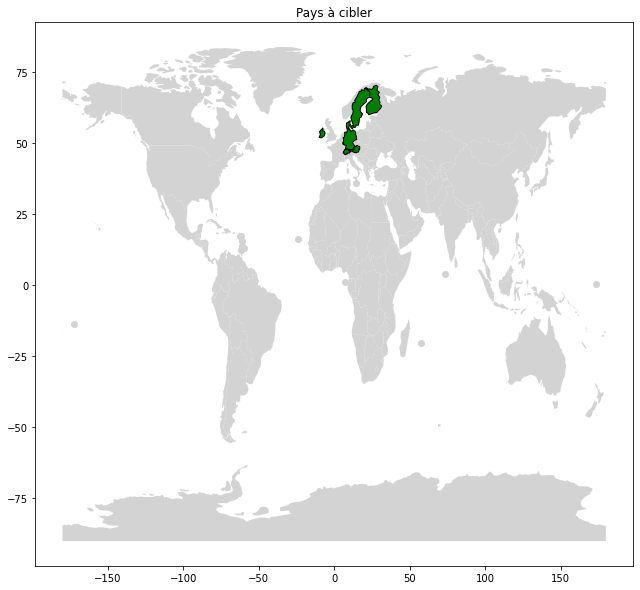

In [82]:
# Filtrer des données pour inclure uniquement nos pays 
pays_a_afficher3 = pays_cible['code ISO3'].unique()
world_subset3 = world[world['iso_a3'].isin(pays_a_afficher3)]


# Carte du monde avec les pays du df
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
world_subset3.plot(ax=ax, color='green', edgecolor='black')
plt.title('Pays à cibler')
plt.show()
